In [1]:
pwd

'C:\\Users\\Henry\\Desktop\\my Portfolio\\Returns_vs_Differencing'

# Time series project @ Evolveu IT Training center Calgary

# Topic : Analytical comparison of simulation accuracy of financia historical series(price) using returns and price differencing.

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [3]:
# data to used for teaching time series
data = pd.read_csv('select_stock.csv')
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
# convert columns to integers
data.columns.values

array(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype=object)

In [5]:
cols = ['spx', 'dax', 'ftse', 'nikkei']

In [6]:
for columns in cols:
    data[columns] = data[columns].astype(int)
    

In [7]:
 data.head(5)

,date,spx,dax,ftse,nikkei
0,07/01/1994,469,2224,3445,18124
1,10/01/1994,475,2225,3440,18443
2,11/01/1994,474,2228,3413,18485
3,12/01/1994,474,2182,3372,18793
4,13/01/1994,472,2142,3360,18577


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    6269 non-null   object
 1   spx     6269 non-null   int32 
 2   dax     6269 non-null   int32 
 3   ftse    6269 non-null   int32 
 4   nikkei  6269 non-null   int32 
dtypes: int32(4), object(1)
memory usage: 147.1+ KB


In [9]:
# import datetime
from datetime import datetime

data.date = pd.to_datetime(data.date,dayfirst=True)
data.head(3)

,date,spx,dax,ftse,nikkei
0,1994-01-07,469,2224,3445,18124
1,1994-01-10,475,2225,3440,18443
2,1994-01-11,474,2228,3413,18485


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   int32         
 2   dax     6269 non-null   int32         
 3   ftse    6269 non-null   int32         
 4   nikkei  6269 non-null   int32         
dtypes: datetime64[ns](1), int32(4)
memory usage: 147.1 KB


In [11]:
data.set_index('date',inplace = True)

In [12]:
# set the frequency
# b representing data was only collected on business day
data =data.asfreq('b')

In [13]:
data.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [14]:
data = data.fillna(value=data.mean())

In [15]:
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

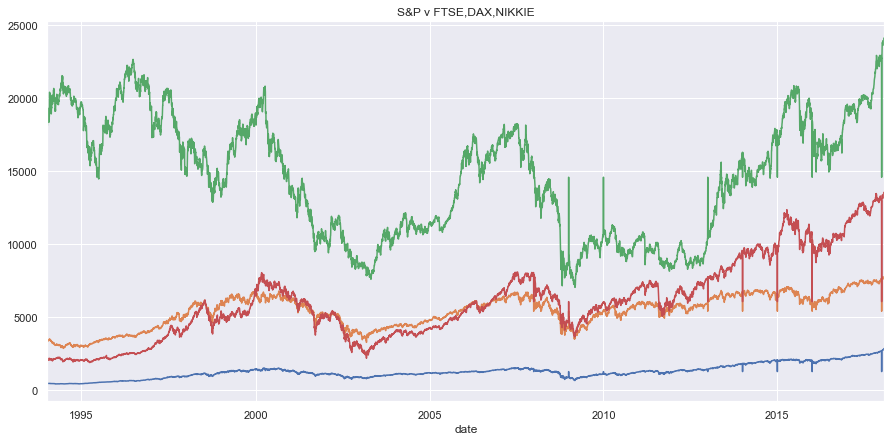

In [16]:
data.spx.plot(figsize=(15,7), title = "S&P500 Prices")
data.ftse.plot(figsize=(15,7), title = "FTSE100 Prices")
data.nikkei.plot(figsize=(15,7), title = "NIKKIE Prices")
data.dax.plot(figsize=(15,7), title = "DAX Prices")
plt.title("S&P v FTSE,DAX,NIKKIE" )
plt.show()

In [17]:
# inspect the data to test for stationarity ie using the visual and equation method
# to enhance data visualization, rolling will be applied to the data to remove noise etc

# computing for 7 day rolling average
data['rolling_avg_ftse'] = data.ftse.rolling(7).mean()

data['rolling_avg_spx'] = data.spx.rolling(7).mean() 

data['rolling_avg_dax'] = data.dax.rolling(7).mean() 

data['rolling_avg_nikkei'] = data.nikkei.rolling(7).mean() 

In [18]:
data.head(10)

,spx,dax,ftse,nikkei,rolling_avg_ftse,rolling_avg_spx,rolling_avg_dax,rolling_avg_nikkei
date,,,,,,,,
1994-01-07,469.0,2224.0,3445.0,18124.0,NaN,NaN,NaN,NaN
1994-01-10,475.0,2225.0,3440.0,18443.0,NaN,NaN,NaN,NaN
1994-01-11,474.0,2228.0,3413.0,18485.0,NaN,NaN,NaN,NaN
1994-01-12,474.0,2182.0,3372.0,18793.0,NaN,NaN,NaN,NaN
1994-01-13,472.0,2142.0,3360.0,18577.0,NaN,NaN,NaN,NaN
1994-01-14,474.0,2151.0,3400.0,18973.0,NaN,NaN,NaN,NaN
1994-01-17,473.0,2115.0,3407.0,18725.0,3405.285714,473.000000,2181.000000,18588.571429
1994-01-18,474.0,2130.0,3437.0,18514.0,3404.142857,473.714286,2167.571429,18644.285714
1994-01-19,474.0,2132.0,3475.0,19039.0,3409.142857,473.571429,2154.285714,18729.428571


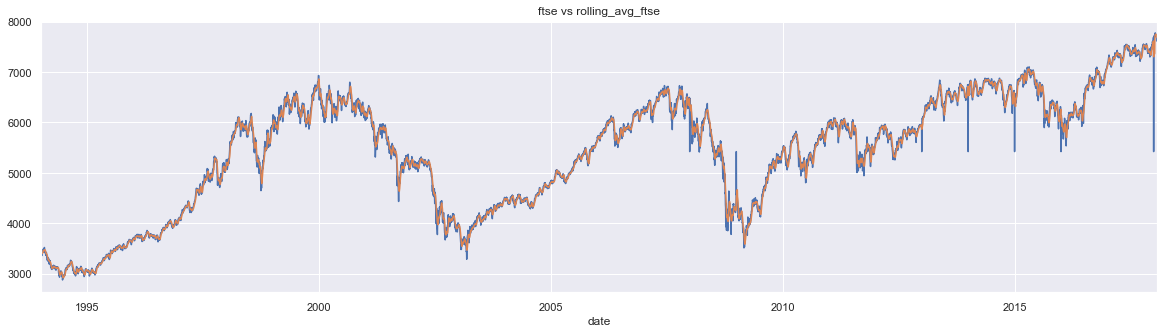

In [19]:
# We can observe that the first 6 values of the ‘7day_rolling_avg’ column are NaN values. Thisis because these 6 values don’t have enough data to compute the rolling average of 7 days. So, in the plot also, for the first six values, no values would be plotted.
data.ftse.plot(figsize=(20,5), title = "ftse Prices")
data.rolling_avg_ftse.plot(figsize=(20,5), title = "rolling_avg_ftse Prices")
plt.title("ftse vs rolling_avg_ftse")
plt.show()

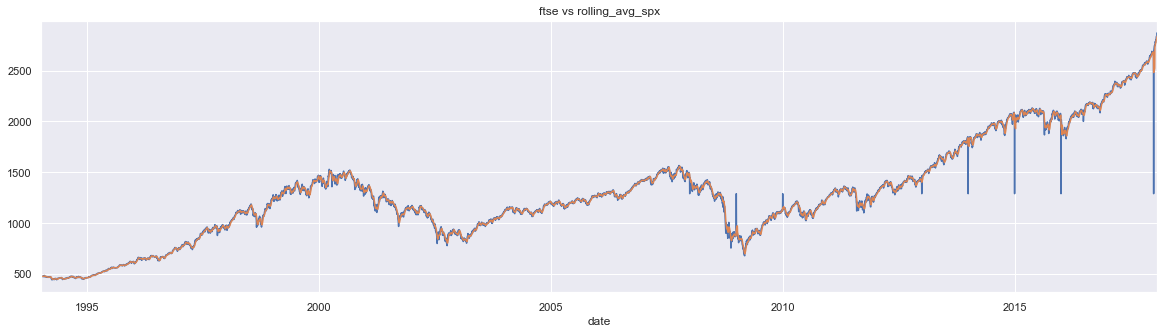

In [20]:
# We can observe that the first 6 values of the ‘7day_rolling_avg’ column are NaN values. Thisis because these 6 values don’t have enough data to compute the rolling average of 7 days. So, in the plot also, for the first six values, no values would be plotted.
data.spx.plot(figsize=(20,5), title = "spx Prices")
data.rolling_avg_spx.plot(figsize=(20,5), title = "rolling_avg_spx Prices")
plt.title("ftse vs rolling_avg_spx")
plt.show()

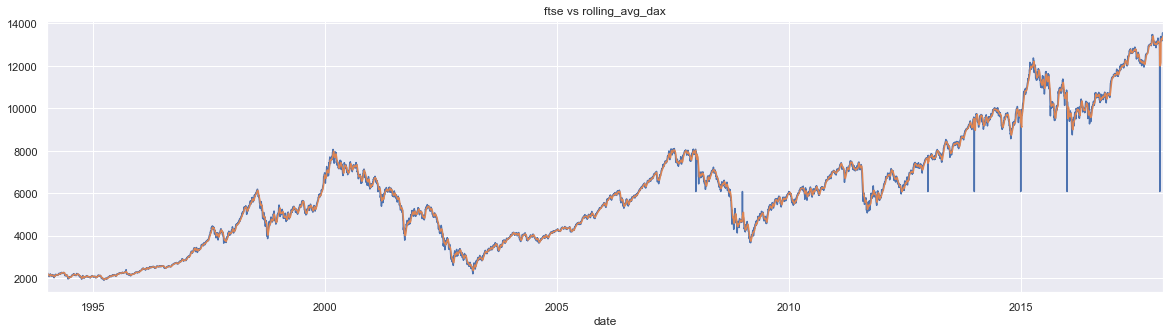

In [21]:
# We can observe that the first 6 values of the ‘7day_rolling_avg’ column are NaN values. Thisis because these 6 values don’t have enough data to compute the rolling average of 7 days. So, in the plot also, for the first six values, no values would be plotted.
data.dax.plot(figsize=(20,5), title = "ftse Prices")
data.rolling_avg_dax.plot(figsize=(20,5), title = "rolling_avg_dax Prices")
plt.title("ftse vs rolling_avg_dax")
plt.show()

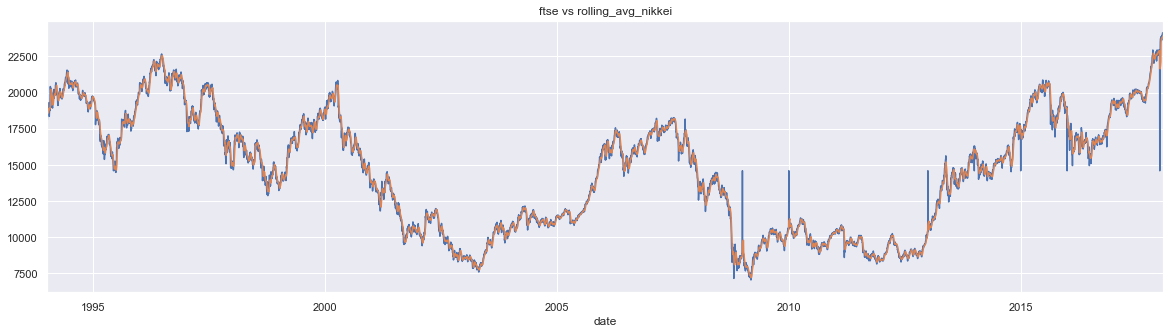

In [22]:
# We can observe that the first 6 values of the ‘7day_rolling_avg’ column are NaN values. Thisis because these 6 values don’t have enough data to compute the rolling average of 7 days. So, in the plot also, for the first six values, no values would be plotted.
data.nikkei.plot(figsize=(20,5), title = "ftse Prices")
data.rolling_avg_nikkei.plot(figsize=(20,5), title = "rolling_avg_nikkei Prices")
plt.title("ftse vs rolling_avg_nikkei")
plt.show()

In [23]:
# Every indication from plot shows that the time series is not stationaries but this will be supported using The DICKEY - FULLER TEST
# In order to interprete the statistics , we will observe the assumption made by :

# If test Statisics is < Critical value = Stationarity
# the p_value must also be statistically significant ie < 0.05
# So there fore the dataset is not stationary. And must be converteed to stationarized. But first let test if it is Seasonal or not.

import statsmodels.tsa.stattools as sts 


In [24]:
sts.adfuller(data.ftse)

(-1.5931381220230316,
 0.4870395437055722,
 7,
 6269,
 {'1%': -3.4313935443677157,
  '5%': -2.8620011543157835,
  '10%': -2.5670154694652805},
 72354.39654218289)

# the result shows that ftse is not stationarized ie p_value is >0.05 and test statistics is not less than the critical value

In [25]:
sts.adfuller(data.dax)

(-0.09979618860008835,
 0.9494588301162835,
 7,
 6269,
 {'1%': -3.4313935443677157,
  '5%': -2.8620011543157835,
  '10%': -2.5670154694652805},
 82201.90821292775)

# the result shows that ftse is not stationarized ie p_value is >0.05 

In [26]:
sts.adfuller(data.nikkei)

(-1.3498416210921578,
 0.6060727404917859,
 3,
 6273,
 {'1%': -3.4313928786754726,
  '5%': -2.8620008601902893,
  '10%': -2.5670153128952853},
 88368.50767803492)

# the result shows that nikkei is not stationarized ie p_value is >0.05 & test statistics is not less than the critica value

In [27]:
sts.adfuller(data.spx)

(1.1188910427376566,
 0.9953746684971282,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 60760.79080693418)

# the result shows that spx is not stationarized ie p_value is >0.05 & test statistics is not less than the critica value

In [28]:
# further effort will be made to inspect if seasonal non-stationality is observed using the Naive method


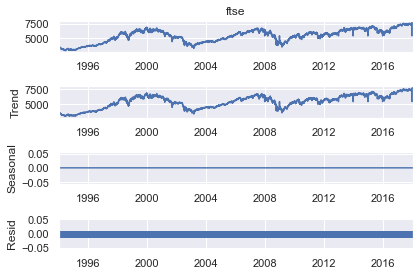

<Figure size 2880x1296 with 0 Axes>

In [29]:
# To Test for Seasonality using Naive method  ie Additive and Multiplicative

from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose_additive_ftse= seasonal_decompose(data.ftse,model="additive", period=1)
seasonal_decompose_additive_ftse.plot()
plt.figure(figsize=(40,18))
plt.show()

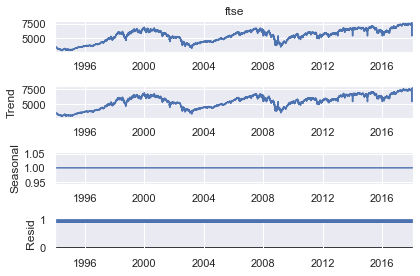

<Figure size 2880x720 with 0 Axes>

In [30]:
# To Test for Seasonality using Naive method   Multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose_multiplicative_ftse= seasonal_decompose(data.ftse,model="multiplicative", period=1)
seasonal_decompose_multiplicative_ftse.plot()
plt.figure(figsize=(40,10))
plt.show()

# ftse is not a seasonal non-stationalized data

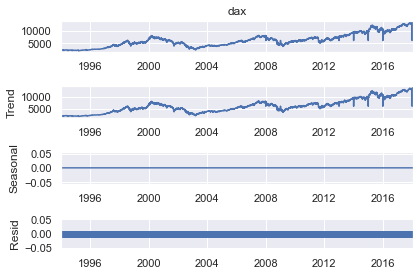

<Figure size 2880x720 with 0 Axes>

In [31]:
seasonal_decompose_additive_dax= seasonal_decompose(data.dax,model="additive", period=1)
seasonal_decompose_additive_dax.plot()
plt.figure(figsize=(40,10))
plt.show()

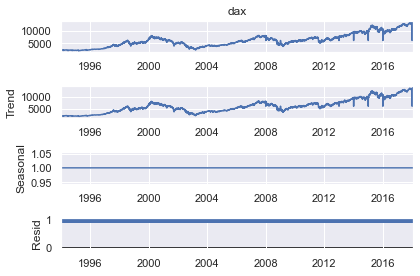

<Figure size 2880x720 with 0 Axes>

In [32]:
seasonal_decompose_multiplicative_dax= seasonal_decompose(data.dax,model="multiplicative", period=1)
seasonal_decompose_multiplicative_dax.plot()
plt.figure(figsize=(40,10))
plt.show()

# dax is also not a seasonal-non stationarized data

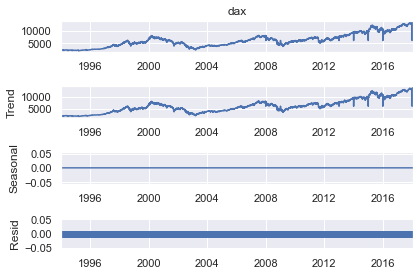

<Figure size 2880x720 with 0 Axes>

In [33]:
seasonal_decompose_additive_nikkei= seasonal_decompose(data.dax,model="additive", period=1)
seasonal_decompose_additive_nikkei.plot()
plt.figure(figsize=(40,10))
plt.show()

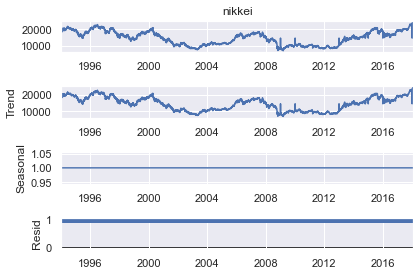

<Figure size 2880x720 with 0 Axes>

In [34]:
seasonal_decompose_multiplicative_nikkei= seasonal_decompose(data.nikkei,model="multiplicative", period=1)
seasonal_decompose_multiplicative_nikkei.plot()
plt.figure(figsize=(40,10))
plt.show()

# Nikkei too is not a seasonal- non stationalized data

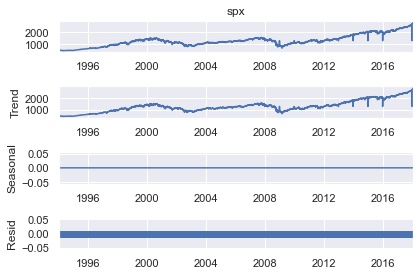

<Figure size 2880x720 with 0 Axes>

In [35]:
seasonal_decompose_additive_spx= seasonal_decompose(data.spx,model="additive", period=1)
seasonal_decompose_additive_spx.plot()
plt.figure(figsize=(40,10))
plt.show()

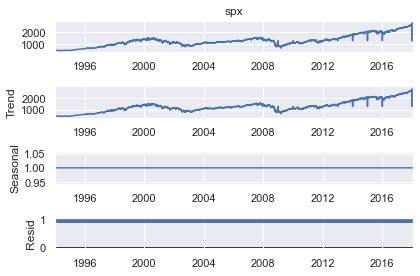

<Figure size 2880x720 with 0 Axes>

In [36]:
seasonal_decompose_multiplicative_spx= seasonal_decompose(data.spx,model="multiplicative", period=1)
seasonal_decompose_multiplicative_spx.plot()
plt.figure(figsize=(40,10))
plt.show()

# spx not a seasonal-non stationalised data

In [37]:
data = data.drop(['rolling_avg_nikkei','rolling_avg_dax','rolling_avg_spx','rolling_avg_ftse'],axis=1)

In [38]:
data['returns_ftse'] = data.ftse.pct_change(1).mul(100)
data['returns_dax'] = data.dax.pct_change(1).mul(100)
data['returns_spx'] = data.spx.pct_change(1).mul(100)
data['returns_nikkei'] = data.nikkei.pct_change(1).mul(100)

data.head(3)

,spx,dax,ftse,nikkei,returns_ftse,returns_dax,returns_spx,returns_nikkei
date,,,,,,,,
1994-01-07,469.0,2224.0,3445.0,18124.0,NaN,NaN,NaN,NaN
1994-01-10,475.0,2225.0,3440.0,18443.0,-0.145138,0.044964,1.279318,1.760097
1994-01-11,474.0,2228.0,3413.0,18485.0,-0.784884,0.134831,-0.210526,0.227729


In [39]:
data.returns_ftse[np.isnan(data.returns_ftse)] = 0
data.returns_ftse[np.isinf(data.returns_ftse)] = 0

sts.adfuller(data.returns_ftse)
# MissingDataError: exog contains inf or nans : this error will be avoided by ie


(-37.465118071126724,
 0.0,
 5,
 6271,
 {'1%': -3.4313932114153967,
  '5%': -2.8620010072061226,
  '10%': -2.567015391155308},
 22324.159055692882)

In [40]:
data.returns_spx[np.isnan(data.returns_spx)] = 0
data.returns_spx[np.isinf(data.returns_spx)] = 0

sts.adfuller(data.returns_spx)

(-35.288503820322056,
 0.0,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 28074.706239982414)

In [41]:
data.returns_dax[np.isnan(data.returns_dax)] = 0
data.returns_dax[np.isinf(data.returns_dax)] = 0

sts.adfuller(data.returns_dax)

(-41.00493404729695,
 0.0,
 4,
 6272,
 {'1%': -3.431393045018898,
  '5%': -2.8620009336864833,
  '10%': -2.567015352019056},
 29683.739817260517)

In [42]:
data.returns_nikkei[np.isnan(data.returns_nikkei)] = 0
data.returns_nikkei[np.isinf(data.returns_nikkei)] = 0

sts.adfuller(data.returns_nikkei)

(-54.21716707871171,
 0.0,
 2,
 6274,
 {'1%': -3.4313927123850956,
  '5%': -2.8620007867175294,
  '10%': -2.5670152737839897},
 26952.269093571358)

# the Returns of the price has stationarised dax,spx,nikkei and ftse

In [43]:
# next wiil be to Integrating the data to make them stationarized

# method 2.(Integrating)

data['int_ftse'] = data.ftse.diff(1)

data['int_dax'] = data.dax.diff(1)

data['int_nikkei'] = data.nikkei.diff(1)

data['int_spx'] = data.spx.diff(1)
data.head(3)

,spx,dax,ftse,nikkei,returns_ftse,returns_dax,returns_spx,returns_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
1994-01-07,469.0,2224.0,3445.0,18124.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1994-01-10,475.0,2225.0,3440.0,18443.0,-0.145138,0.044964,1.279318,1.760097,-5.0,1.0,319.0,6.0
1994-01-11,474.0,2228.0,3413.0,18485.0,-0.784884,0.134831,-0.210526,0.227729,-27.0,3.0,42.0,-1.0


In [44]:
data.int_ftse[np.isnan(data.int_ftse)] = 0
data.int_ftse[np.isinf(data.int_ftse)] = 0

sts.adfuller(data.int_ftse)

(-34.644796335238475,
 0.0,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 72355.17399741118)

In [45]:
data.int_dax[np.isnan(data.int_dax)] = 0
data.int_dax[np.isinf(data.int_dax)] = 0
sts.adfuller(data.int_dax)

(-37.00342416043289,
 0.0,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 82199.92205515999)

In [46]:
data.int_nikkei[np.isnan(data.int_nikkei)] = 0
data.int_nikkei[np.isinf(data.int_nikkei)] = 0
sts.adfuller(data.int_nikkei)

(-36.72306984685792,
 0.0,
 5,
 6271,
 {'1%': -3.4313932114153967,
  '5%': -2.8620010072061226,
  '10%': -2.567015391155308},
 88368.32078829122)

In [47]:
data.int_spx[np.isnan(data.int_spx)] = 0
data.int_spx[np.isinf(data.int_spx)] = 0
sts.adfuller(data.int_spx)

(-31.816050690493885,
 0.0,
 9,
 6267,
 {'1%': -3.4313938775326336,
  '5%': -2.862001301519361,
  '10%': -2.5670155478252497},
 60759.98971999254)

In [48]:
# Using differencing approach has also stationarized the data

In [49]:
data = data.iloc[1:]
data.head(3)

,spx,dax,ftse,nikkei,returns_ftse,returns_dax,returns_spx,returns_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
1994-01-10,475.0,2225.0,3440.0,18443.0,-0.145138,0.044964,1.279318,1.760097,-5.0,1.0,319.0,6.0
1994-01-11,474.0,2228.0,3413.0,18485.0,-0.784884,0.134831,-0.210526,0.227729,-27.0,3.0,42.0,-1.0
1994-01-12,474.0,2182.0,3372.0,18793.0,-1.201289,-2.064632,0.000000,1.666216,-41.0,-46.0,308.0,0.0


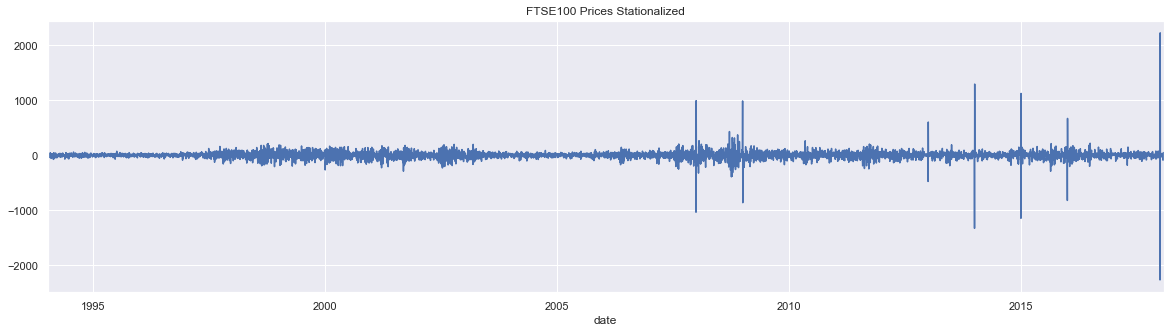

In [50]:
data.int_ftse.plot(figsize=(20,5), title = "FTSE100 Prices Stationalized")
plt.show()

In [51]:
# Now to select best model that defines the series
# Next will be to select best ARIMA Model that fits the series, We are going to follow the rules to confirm if ARIMA is satisfied
# And use Auto_ARIMA TO Select each best lag

# AR = ACF (Spikes decay towards zero)  &  PACF (Spike cut off to zero)
# MA= PACF (Spikes decay towards zero)  &  ACF (Spike cut off to zero)
# ARIMA = PACF (Spikes decay towards zero) & ACF (Spikes decay towards zero)

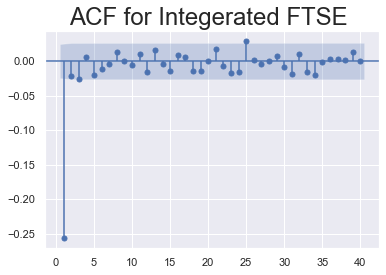

In [52]:
## ACF and PACF for Returns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data.int_ftse, zero = False, lags = 40)
plt.title("ACF for Integerated FTSE ", size=24)
plt.show()

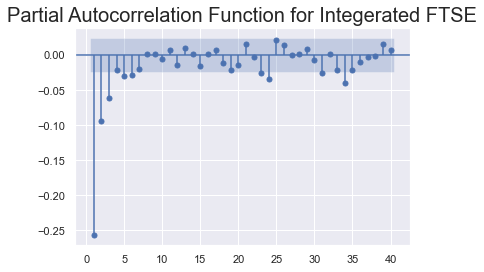

In [53]:
sgt.plot_pacf(data.int_ftse, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Integerated FTSE",size=20)
plt.show()


# Auto _ ARIMA concept will be employed to easily select best lag time

In [54]:
from pmdarima.arima import auto_arima  
from pmdarima.arima import OCSBTest 

# I am going to be using the Akaike information criterion(AIC) as a matrix to compare the performance of various ARIMA based models
# # for seasonal we have p d q and P D Q values for ARIMA  based models# for seasonal we have p d q and P D Q values for ARIMA  based models


# returns_ftse  returns_dax   returns_spx   returns_nikkei  int_ftse  int_dax  int_nikkei   int_spx

In [55]:
 model_returns_ftse  = auto_arima (data.returns_ftse,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22807.507, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=22495.863, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=22451.073, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=22436.799, Time=0.46 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=22432.142, Time=1.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=22459.627, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=22434.108, Time=2.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=22433.287, Time=3.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=22432.034, Time=1.56 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=22441.018, Time=0.49 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=22436.551, Time=0.84 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=22434.570, Time=0.61 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=22433.905, Time=4.42 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=22429.898, Time=3.95 sec
 ARIMA(0,0,2)(0,0,0

In [56]:
 model_int_ftse = auto_arima (data.int_ftse,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=73231.138, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=72804.277, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=72734.788, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=72722.942, Time=0.48 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=72718.047, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=72751.219, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=72719.877, Time=1.85 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=72719.772, Time=4.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=72717.865, Time=1.30 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=72725.927, Time=0.54 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=72719.768, Time=2.48 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=72720.700, Time=0.49 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=72720.969, Time=4.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=72718.634, Time=4.27 sec

Best model:  ARIMA

#  Both the Return and Difference of price have same lag time for ftse ie (ARIMA(1,0,2))

In [57]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [58]:
from statsmodels.tsa.arima_model import ARIMA
# Models for ftse

model_returns_ftse = ARIMA(data.returns_ftse, order=(1,0,2))
results_returns_ftse = model_returns_ftse.fit()



model_int_ftse = ARIMA(data.int_ftse, order=(1,0,2))
results_int_ftse = model_int_ftse.fit()

C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [59]:
#  Estimating lag time for dax
model_returns_dax  = auto_arima (data.returns_dax ,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30583.938, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=29924.379, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=29824.206, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29825.458, Time=0.57 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=29825.512, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=29827.908, Time=0.68 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=29817.181, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=30582.710, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=29818.186, Time=1.69 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=29818.266, Time=1.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=29920.158, Time=0.49 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=29820.886, Time=1.97 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 8.836 seconds


In [60]:
model_int_dax = auto_arima (data.int_dax,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84096.022, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=82960.689, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=82611.206, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=82611.872, Time=0.59 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=82611.869, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=82614.722, Time=1.59 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=82610.250, Time=1.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=84097.514, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=82610.811, Time=2.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=82610.896, Time=2.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=82961.481, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=82613.869, Time=3.84 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 14.068 seconds


# Also both Returns and Price Differencing for dax = ARIMA(0,0,1)

In [61]:
model_returns_dax = ARIMA(data.returns_dax, order=(0,0,1))
results_returns_dax = model_returns_dax.fit()



model_int_dax = ARIMA(data.int_dax, order=(0,0,1))
results_int_dax = model_int_dax.fit()

C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [62]:

#  Estimating lag time for dax
model_returns_spx = auto_arima (data.returns_spx ,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29185.945, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=28383.132, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=28204.028, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=28203.849, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=28205.338, Time=0.99 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=28204.200, Time=2.36 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=28203.934, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=28241.387, Time=0.36 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=28207.102, Time=2.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=28194.222, Time=1.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=28194.922, Time=0.84 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=28378.556, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=28195.373, Time=1.96 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=28193.647, Time=6.45 sec
 ARIMA(0,0,2)(0,0,0

In [63]:
model_int_spx = auto_arima (data.int_spx,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=62978.901, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=61677.610, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61057.962, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=61055.621, Time=0.77 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=61056.486, Time=1.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=61055.623, Time=2.69 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=61055.808, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=61294.018, Time=0.24 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=61059.187, Time=1.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=61051.010, Time=2.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=61053.754, Time=1.80 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=61677.889, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61051.660, Time=3.98 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=61050.597, Time=10.13 sec
 ARIMA(0,0,2)(0,0,

In [64]:
model_int_spx = ARIMA(data.int_spx, order=(1,0,2))
results_returns_spx = model_int_spx.fit()


model_int_spx = ARIMA(data.returns_spx, order=(1,0,2))
results_int_spx = model_int_spx.fit()

C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

# Also both Returns and Price Differencing for spx = ARIMA(1,0,2)

In [65]:

#  Estimating lag time for dax
model_returns_nikkei = auto_arima (data.returns_nikkei,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=27672.774, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=27160.069, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=27099.390, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=27100.956, Time=0.48 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=27100.964, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=27103.279, Time=0.66 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=27099.158, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=27673.805, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=27100.684, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=27100.693, Time=1.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=27160.353, Time=0.41 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=27103.036, Time=1.81 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 7.912 seconds


In [66]:
model_int_nikkei = auto_arima (data.int_nikkei,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=89566.775, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=88956.736, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=88879.763, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=88881.580, Time=0.68 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=88881.592, Time=0.49 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=88883.696, Time=0.88 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=88881.651, Time=0.67 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 3.281 seconds


In [67]:
model_int_nikkei= ARIMA(data.int_nikkei, order=(0,0,1))
results_returns_nikkei= model_int_nikkei.fit()


model_int_nikkei = ARIMA(data.returns_nikkei, order=(0,0,1))
results_int_nikkei = model_int_nikkei.fit()

C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


# Also both Returns and Price Differencing for nikkei = ARIMA(0,0,1)

In [68]:
# Now am gonna divide the data into train and test



nobs =12
train,test =data[0:-nobs],data[-nobs: ]

In [69]:
train.tail(3)

,spx,dax,ftse,nikkei,returns_ftse,returns_dax,returns_spx,returns_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
2018-01-09,2751.0,13385.0,7731.0,23849.0,0.454782,0.134660,0.145613,0.569284,35.0,18.0,135.0,4.0
2018-01-10,2748.0,13281.0,7748.0,23788.0,0.219894,-0.776989,-0.109051,-0.255776,17.0,-104.0,-61.0,-3.0
2018-01-11,2767.0,13202.0,7762.0,23710.0,0.180692,-0.594835,0.691412,-0.327896,14.0,-79.0,-78.0,19.0


In [70]:
test.head(3)

,spx,dax,ftse,nikkei,returns_ftse,returns_dax,returns_spx,returns_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
2018-01-12,2786.0,13245.0,7778.0,23653.0,0.206132,0.325708,0.686664,-0.240405,16.0,43.0,-57.0,19.0
2018-01-15,2786.0,13200.0,7769.0,23714.0,-0.115711,-0.339751,0.000000,0.257895,-9.0,-45.0,61.0,0.0
2018-01-16,2776.0,13246.0,7755.0,23951.0,-0.180203,0.348485,-0.358938,0.999410,-14.0,46.0,237.0,-10.0


In [71]:
train.shape , test.shape

((6264, 12), (12, 12))

In [72]:
# For Returns of price
Start_returns_ftse = len(train.returns_ftse)
end_returns_ftse = len(train.returns_ftse) + len(test.returns_ftse)-1


In [73]:
# for difference of price
Start_int_ftse = len(train.int_ftse)
end_int_ftse = len(train.int_ftse) + len(test.int_ftse)-1

<AxesSubplot:xlabel='date'>

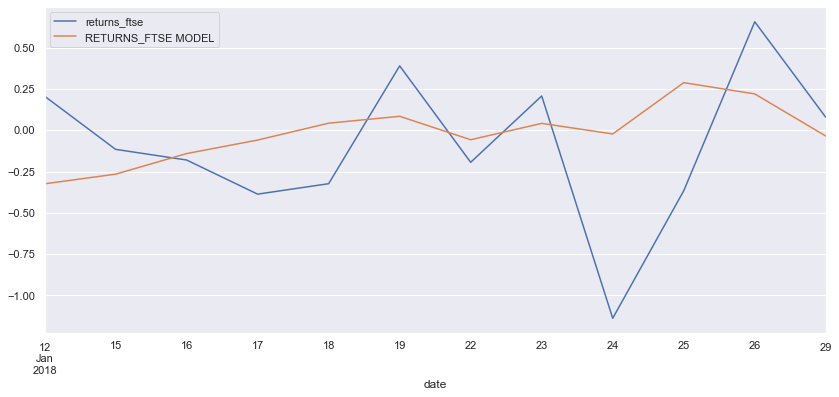

In [74]:
predictions_returns_ftse = results_returns_ftse.predict(Start_returns_ftse,end_returns_ftse).rename('RETURNS_FTSE MODEL')
test.returns_ftse.plot(legend=True,figsize =(14,6))
predictions_returns_ftse .plot(legend=True)

In [75]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


print(np.sqrt(mean_squared_error(test.returns_ftse,predictions_returns_ftse )))

0.46214176800871515


<AxesSubplot:xlabel='date'>

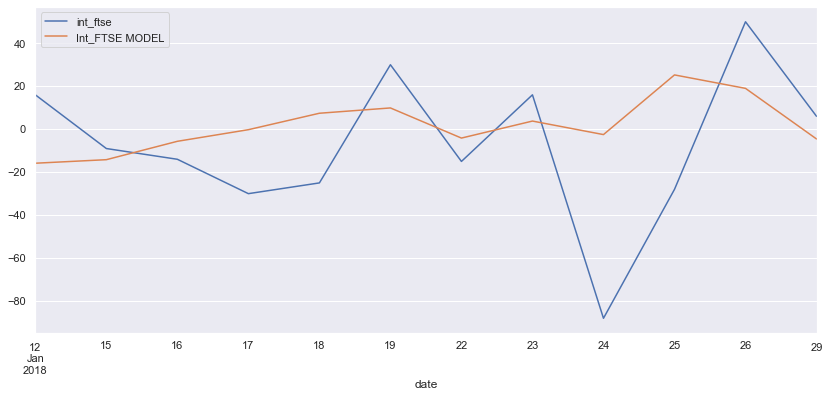

In [76]:
predictions_int_ftse = results_int_ftse.predict(Start_int_ftse,end_int_ftse).rename('Int_FTSE MODEL')
test.int_ftse.plot(legend=True,figsize =(14,6))
predictions_int_ftse.plot(legend=True)

In [77]:

print(np.sqrt(mean_squared_error(test.int_ftse,predictions_int_ftse )))

35.28176337527555


# mean_squared_error =  117.3 for int_ftse &  1.92 for returns_ftse

In [78]:
# For Returns of price
Start_returns_dax = len(train.returns_dax)
end_returns_dax = len(train.returns_dax) + len(test.returns_dax)-1

In [79]:
# for difference of price
Start_int_dax = len(train.int_dax)
end_int_dax = len(train.int_dax) + len(test.int_dax)-1

<AxesSubplot:xlabel='date'>

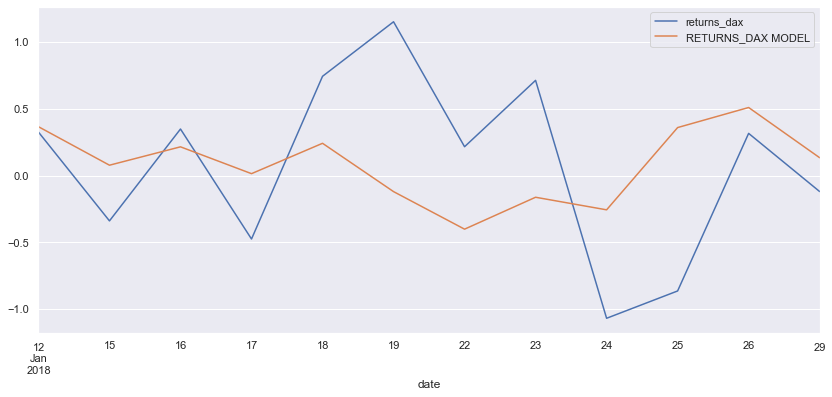

In [80]:
predictions_returns_dax = results_returns_dax.predict(Start_returns_dax,end_returns_dax).rename('RETURNS_DAX MODEL')
test.returns_dax.plot(legend=True,figsize =(14,6))
predictions_returns_dax .plot(legend=True)

<AxesSubplot:xlabel='date'>

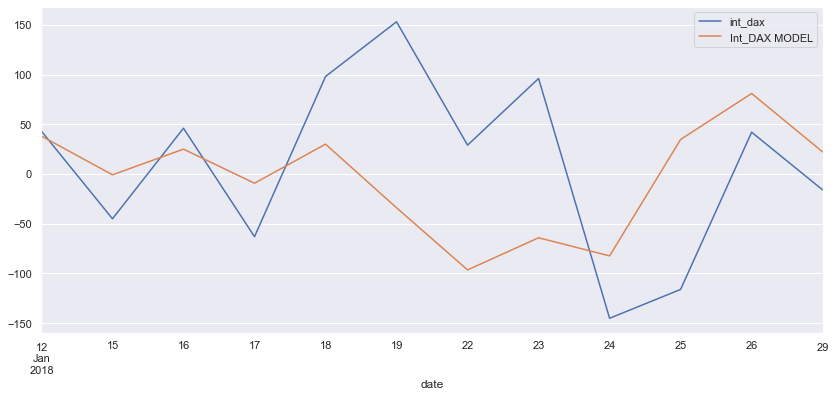

In [81]:
predictions_int_dax = results_int_dax.predict(Start_int_dax,end_int_dax).rename('Int_DAX MODEL')
test.int_dax.plot(legend=True,figsize =(14,6))
predictions_int_dax.plot(legend=True)

In [82]:
print(np.sqrt(mean_squared_error(test.int_dax,predictions_int_dax)))

98.25458527230582


In [83]:
print(np.sqrt(mean_squared_error(test.returns_dax,predictions_returns_dax)))

0.6899946062666192


# mean_squared_error = 337.47 for int_dax   &     4.61 for returns_dax


In [84]:
# For Returns of price
Start_returns_spx = len(train.returns_spx)
end_returns_spx = len(train.returns_spx) + len(test.returns_spx)-1

In [85]:
# for difference of price
Start_int_spx= len(train.int_spx)
end_int_spx= len(train.int_spx) + len(test.int_spx)-1

<AxesSubplot:xlabel='date'>

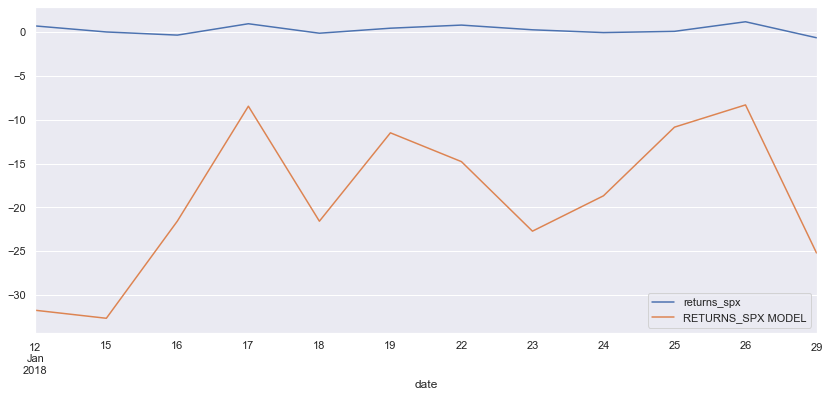

In [86]:
predictions_returns_spx = results_returns_spx.predict(Start_returns_spx,end_returns_spx).rename('RETURNS_SPX MODEL')
test.returns_spx.plot(legend=True,figsize =(14,6))
predictions_returns_spx .plot(legend=True)

In [87]:
predictions_int_spx = results_int_spx.predict(Start_int_spx,end_int_spx).rename('Int_SPX MODEL')


<AxesSubplot:xlabel='date'>

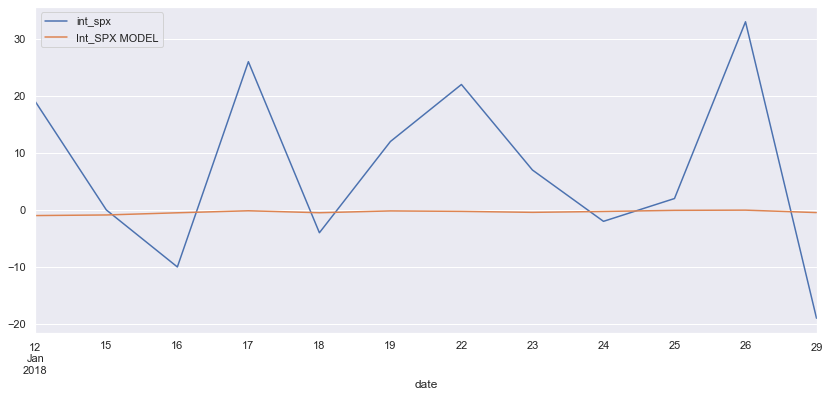

In [88]:
test.int_spx.plot(legend=True,figsize =(14,6))
predictions_int_spx.plot(legend=True)

In [89]:
print(np.sqrt(mean_squared_error(test.int_spx,predictions_int_spx)))

16.65094364255362


In [90]:
print(np.sqrt(mean_squared_error(test.returns_spx,predictions_returns_spx)))

20.782963944527793


# mean_squared_error = 74.37 for int_spx & 32.91 for returns_spx

In [91]:
# For Returns of price
Start_returns_nikkei = len(train.returns_nikkei)
end_returns_nikkei= len(train.returns_nikkei) + len(test.returns_nikkei)-1

In [92]:
# for difference of price
Start_int_nikkei= len(train.int_nikkei)
end_int_nikkei= len(train.int_nikkei) + len(test.int_nikkei)-1

<AxesSubplot:xlabel='date'>

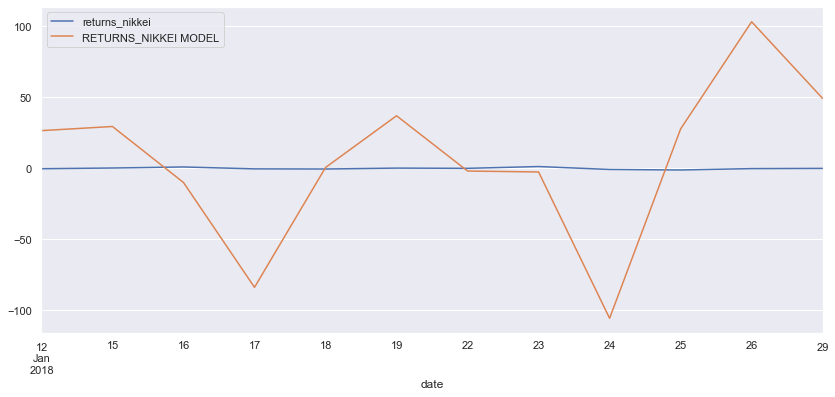

In [93]:
predictions_returns_nikkei = results_returns_nikkei.predict(Start_returns_nikkei,end_returns_nikkei).rename('RETURNS_NIKKEI MODEL')
test.returns_nikkei.plot(legend=True,figsize =(14,6))
predictions_returns_nikkei .plot(legend=True)

<AxesSubplot:xlabel='date'>

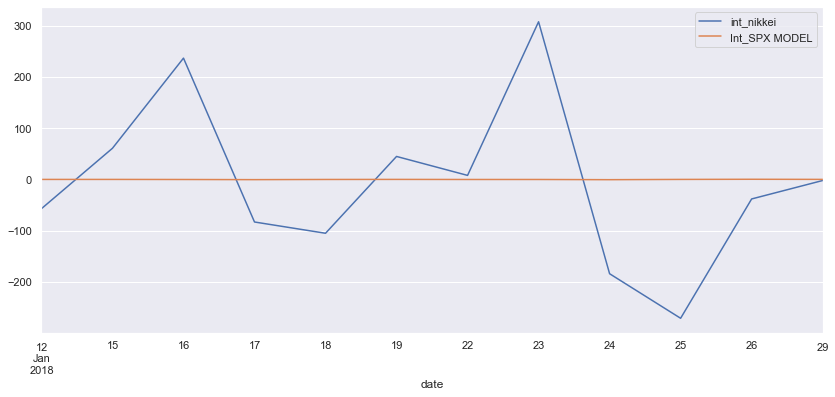

In [94]:
predictions_int_nikkei = results_int_nikkei.predict(Start_int_nikkei,end_int_nikkei).rename('Int_SPX MODEL')
test.int_nikkei.plot(legend=True,figsize =(14,6))
predictions_int_nikkei.plot(legend=True)

In [95]:
print(np.sqrt(mean_squared_error(test.int_nikkei,predictions_int_nikkei)))

154.55913834415108


In [96]:
print(np.sqrt(mean_squared_error(test.returns_nikkei,predictions_returns_nikkei)))

53.94380356127805
